In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Import our data into pandas from CSV
df = pd.read_csv('../Resources/accidents.csv', low_memory=False)

df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,...,27,27,0,NaN,0,NaN,0,NaN,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,...,99,Unknown EMS Hospital Arrival Time,0,NaN,0,NaN,0,NaN,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,...,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,NaN,0,NaN,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,...,88,Not Applicable (Not Transported),0,NaN,0,NaN,0,NaN,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,NaN,0,NaN,0,NaN,1,1


In [6]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [10]:
# Create a group based on the values in the 'FUNC_SYSNAME' column
# 'FUNC_SYSNAME' stores the type of road the accident occurred
road_type = df.groupby(['FUNC_SYSNAME'])['FUNC_SYSNAME'].count()

# Count how many times each road type appears in our group
# data = df.groupby(['FUNC_SYSNAME']).agg({'FUNC_SYSNAME' : 'count'})
road_type

FUNC_SYSNAME
Interstate                                             4168
Local                                                  4151
Major Collector                                        4860
Minor Arterial                                         7284
Minor Collector                                        1236
Not Reported                                             36
Principal Arterial - Other                             9987
Principal Arterial - Other Freeways and Expressways    1358
Trafficway Not in State Inventory                        85
Unknown                                                  79
Name: FUNC_SYSNAME, dtype: int64

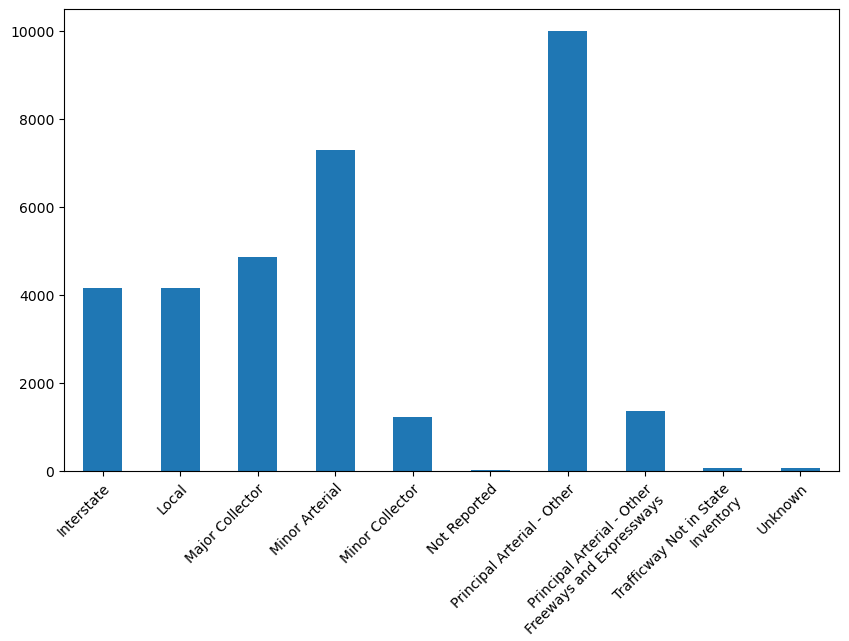

In [19]:
# Create a bar chart based off of the group series from before
data = road_type.plot(kind='bar', figsize=(10, 6), x='Road Type', y="Num Accidents")

# Set the xlabel and ylabel using class methods
data.set_xticklabels(road_type.index, ha='right', rotation_mode='anchor',rotation=45, wrap=True)

plt.show()